<h2>Camera Calibration Routine</h2></n>
<a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html#goal/" target="_blank"> OpenCV_Cal_Tutorial</a>

In [7]:
#Library Imports
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001) #(max_iterations = 30, epsilon_accuracy = 0.001)

#Specify checkerboard grid size
chk_row = 6
chk_col = 8

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((chk_row*chk_col,3), np.float32) #Creates a meshgrid for 3d space objects
objp[:,:2] = np.mgrid[0:chk_col,0:chk_row].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (chk_col,chk_row),None) #(Checker inner corners (line) = y=8, x=6; disregard incomplete rows/columns)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria) #Searches 11x11 winsize. -1-1 default no zerozone. 
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (chk_col, chk_row), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(1000)

cv2.destroyAllWindows()
print("Object and Image Points Captured!")

Object and Image Points Captured!


In [5]:
#Calibration Function
"""
ret: mean reprojection error
mtx: the matrix of intrisic parameters;
dist: the distortion parameters;
rvecs: the rotation vectors (one per image);
tvecs: the translation vectors (one per image).
"""

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
print('Mean reprojection error:',ret)
print('3x3 Calibration Matrix (Projective Transformation):',mtx)
print('Distortion Parameters:',dist)
print('Rotation vectors:',rvecs)
print('Translation vectors:',tvecs)

Mean reprojection error: 0.6466422264768117
3x3 Calibration Matrix (Projective Transformation): [[973.81437293   0.         669.53494442]
 [  0.         969.43632659 355.12653027]
 [  0.           0.           1.        ]]
Distortion Parameters: [[-0.00786331  0.08823673  0.0027053   0.00218111 -0.32638841]]
Rotation vectors: [array([[-0.10081548],
       [-0.75833859],
       [ 0.04338814]]), array([[-0.05227207],
       [ 0.52288486],
       [-0.03216335]]), array([[-0.7205297 ],
       [-0.01259079],
       [ 0.01371332]]), array([[-0.4365531 ],
       [-0.46241   ],
       [-0.50465567]]), array([[-0.31351246],
       [ 0.40948732],
       [ 0.62055092]]), array([[-0.07173807],
       [-0.79848852],
       [ 0.07923834]]), array([[-0.05377094],
       [ 0.56990742],
       [-0.13815766]]), array([[-0.24892613],
       [-0.06122542],
       [ 0.08061062]]), array([[-0.05623676],
       [ 0.34288641],
       [-0.02744755]]), array([[-0.0509646 ],
       [-0.05777051],
       [-0.0304

<h3>Use only for multiple Image writing</h3>

In [59]:
#Rescale and undistort all images in directory 
images = glob.glob('*.png')
i=0
#Create directory to store undistorted images
un_dist_path=(r'C:\Users\A8DPDZZ\Documents\MyDocuments\MyDocuments\Analysis\RESET - CV WIKA Gauge\Calibration\undistort')
for fname in images:
    try:
        im = cv2.imread(fname)
        h,  w = im.shape[:2]
        newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
        # undistort
        dst = cv2.undistort(im, mtx, dist, None, newcameramtx)
        # crop the image
        x,y,w,h = roi
        dst = dst[y:y+h, x:x+w]
        cv2.imwrite(os.path.join(un_dist_path, fname),dst)
        i=i+1
        print(fname)
    except:
        print("Undistort loop exited without writing")

image 0.png
image 1.png
image 10.png
image 11.png
image 12.png
image 13.png
image 14.png
image 15.png
image 16.png
image 2.png
image 3.png
image 4.png
image 5.png
image 6.png
image 7.png
image 8.png
image 9.png


<h2>Use for single image undistort</h2>

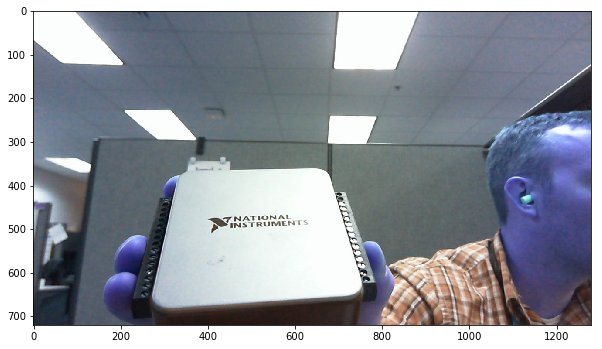

In [6]:
#Scaling parameter in OpenCV
im_loc = (r'C:\Users\A8DPDZZ\Documents\MyDocuments\MyDocuments\Analysis\RESET - CV WIKA Gauge\camCal2\image test\imtest.jpg')
im = cv2.imread(im_loc)
h,  w = im.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
fig,ax = plt.subplots(figsize=(10,7))
plt.imshow(im)

<h2>cv2.undistort method</h2>

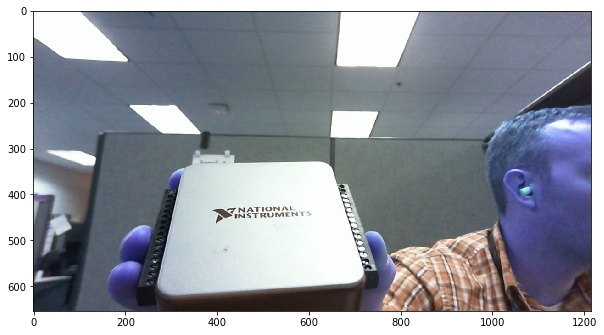

In [9]:
# undistort
dst = cv2.undistort(im, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
#cv2.imwrite('imagetest_calibresult.png',dst)
fig,ax = plt.subplots(figsize=(10,7))
plt.imshow(dst)

<h2>Remapping method</h2>

In [69]:
#check this link on monday https://github.com/opencv/opencv/blob/master/samples/python/calibrate.py

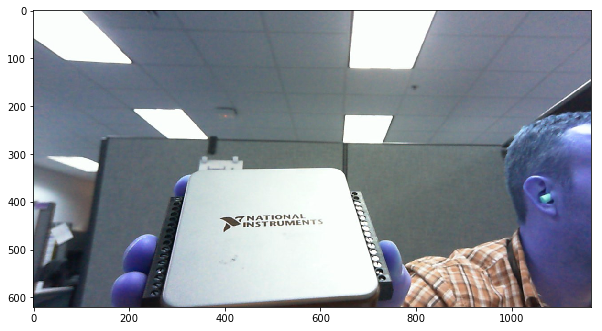

In [10]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(im,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
#cv2.imwrite('im18_calibresult.png',dst)
fig,ax = plt.subplots(figsize=(10,7))
plt.imshow(dst)

In [11]:
#Calculates total error. Need to understand error calculation better

tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error

print("total error: ", tot_error/len(objpoints))

total error:  0.08533172881345516
